In [118]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ALL_LISTINGS = []
TOTAL = 0
PAGES = 100
for PAGE in range(1, PAGES + 1):
    TARGET_URL = f'https://www.avito.ma/fr/maroc/voitures?o={PAGE}'
    HEADERS = {'user-agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/144.0.0.0 Safari/537.36"}
    RESPONSE = requests.get(TARGET_URL, headers=HEADERS)
    PAGE_CONTENT = bs(RESPONSE.content, "html.parser")
    LISTINGS = PAGE_CONTENT.find_all("a", class_="sc-1jge648-0")

    for LISTING in LISTINGS:

        TITLE = LISTING.find("p" , class_="sc-1x0vz2r-0 iHApav")
        TITLE = TITLE.text.strip() if TITLE else "N/A"

        TYPE_LOCATION = LISTING.find("div", class_="sc-b57yxx-10 fHMeoC")
        TYPE_LOCATION = TYPE_LOCATION.text.strip() if TYPE_LOCATION else "N/A"
        TYPE_LOCATION = TYPE_LOCATION.split(" dans ")
        TYPE = TYPE_LOCATION[0]
        LOCATION = TYPE_LOCATION[1]

        DATE = LISTING.find("p", class_="sc-1x0vz2r-0 layWaX")
        DATE = DATE.text.strip() if DATE else "N/A"
        
        TAGS = LISTING.find_all("span", class_="sc-1s278lr-0 cAiIZZ")
        TAGS = [TAG.text.strip() for TAG in TAGS] if TAGS else []
        try :
            YEAR = TAGS[0]
            TRANSMISSION = TAGS[1]
            FUEL = TAGS[2]
        except IndexError:
            YEAR = "N/A"
            TRANSMISSION = "N/A"
            FUEL = "N/A"

        IMAGE_TAG = LISTING.find("img", class_="sc-1lb3x1r-3")
        IMAGE = IMAGE_TAG["src"] if IMAGE_TAG and IMAGE_TAG.get("src") else "N/A"

        OWNER = LISTING.find("p", class_="sc-1x0vz2r-0 hNCqYw sc-5rosa-7 hHZQmC")
        OWNER = OWNER.text.strip() if OWNER else "-"

        LINK = LISTING.get("href") if LISTING and LISTING.get("href") else "N/A"
        
        ALL_LISTINGS.append({
            "type_annonce" : TYPE,
            "titre" : TITLE,
            "location" : LOCATION,
            "date" : DATE,
            "modele" : YEAR,
            "transsmission" : TRANSMISSION,
            "carburant" : FUEL,
            "image" : IMAGE,
            "propriétere" : OWNER,
            "link" : LINK
        })

        TOTAL += 1
        
print(TOTAL)

ConnectionError: HTTPSConnectionPool(host='www.avito.ma', port=443): Max retries exceeded with url: /fr/maroc/voitures?o=1 (Caused by NameResolutionError("HTTPSConnection(host='www.avito.ma', port=443): Failed to resolve 'www.avito.ma' ([Errno 11001] getaddrinfo failed)"))

In [ ]:
df = pd.DataFrame(ALL_LISTINGS)
df['titre'] = df['titre'].str.lower()
df['location'] = df['location'].str.lower()

df["ville"] = df["location"].str.split(",").str[0]
df["quartier"] = df["location"].str.split(",").str[1]
df["quartier"] = df["quartier"].str.lstrip(" ")
df['modele'] = pd.to_numeric(df['modele'], errors='coerce')
df['modele'] = df['modele'].astype('Int64') 

df.to_csv("listings.csv", index=0)
df.head(10)

,type_annonce,titre,location,date,modele,transsmission,carburant,image,propriétere,link,ville,quartier
0,Voitures d'occasion,stellantis - peugeot 3008 - 2025,"casablanca, ain sebaa",il y a 1 heure,2025,Automatique,Hybride,https://content.avito.ma/classifieds/images/10...,SPOTICAR MOULAY SLIMANE,https://www.avito.ma/fr/ain_sebaa/voitures_d_o...,casablanca,ain sebaa
1,Voitures d'occasion,mercedes-benz classe glk 200 diesel,"rabat, hay riad",il y a 22 heures,2014,Manuelle,Diesel,https://content.avito.ma/classifieds/images/10...,LH,https://www.avito.ma/fr/hay_riad/voitures_d_oc...,rabat,hay riad
2,Voitures d'occasion,honda accord essence boss,"temara, autre secteur",il y a 21 heures,2008,Automatique,Essence,https://content.avito.ma/classifieds/images/10...,MOUNY AUTO,https://www.avito.ma/fr/autre_secteur/voitures...,temara,autre secteur
3,Voitures de location,location de voiture kia carnival 8 places,"casablanca, maarif",il y a 5 minutes,<NA>,N/A,N/A,N/A,HORENT CAR,https://www.avito.ma/fr/maarif/voitures_de_loc...,casablanca,maarif
4,Voitures d'occasion,megane coupé 1.9,"casablanca, 2 mars",il y a 8 minutes,2009,Manuelle,Diesel,N/A,LAVAGE AUTO SAAD,https://www.avito.ma/fr/2_mars/voitures_d_occa...,casablanca,2 mars
5,Voitures d'occasion,renault kangoo dic,"temara, abbadi",il y a 5 minutes,2008,Manuelle,Diesel,N/A,AUTO ISLAM,https://www.avito.ma/fr/abbadi/voitures_d_occa...,temara,abbadi
6,Voitures d'occasion,208 allure,"oujda, centre ville",il y a 4 minutes,2024,Manuelle,Diesel,N/A,Lfilali Lmahboul,https://www.avito.ma/fr/centre_ville/voitures_...,oujda,centre ville
7,Voitures d'occasion,fiat diblo,"marrakech, socoma",il y a 4 minutes,2018,Manuelle,Diesel,N/A,Yass,https://www.avito.ma/fr/socoma/voitures_d_occa...,marrakech,socoma
8,Voitures de location,location de voiture bon prix,"casablanca, oulfa",il y a 9 minutes,<NA>,N/A,N/A,N/A,VAL CAR,https://www.avito.ma/fr/oulfa/voitures_de_loca...,casablanca,oulfa
9,Voitures d'occasion,ford fiesta diesel manuelle 2011 à rabat,"rabat, hay al farah",il y a 8 minutes,2011,Manuelle,Diesel,N/A,ROYALCAR RABAT,https://www.avito.ma/fr/hay_al_farah/voitures_...,rabat,hay al farah


In [ ]:
#Cities with the most traffic
print("Top 10 villes aves le plus nombre des annonces:\n")
print(df['ville'].value_counts().head(10))

#Most used fuel types
print("Nombre de vehicules par carburant:\n")
print(df['carburant'].value_counts())

Top 10 villes aves le plus nombre des annonces:

ville
casablanca    1646
rabat          544
marrakech      318
agadir         223
tanger         195
fès            172
salé            88
kénitra         82
oujda           70
tétouan         67
Name: count, dtype: int64
Nombre de vehicules par carburant:

carburant
Diesel        2775
Essence        422
N/A            313
Hybride        231
Electrique      21
Name: count, dtype: int64


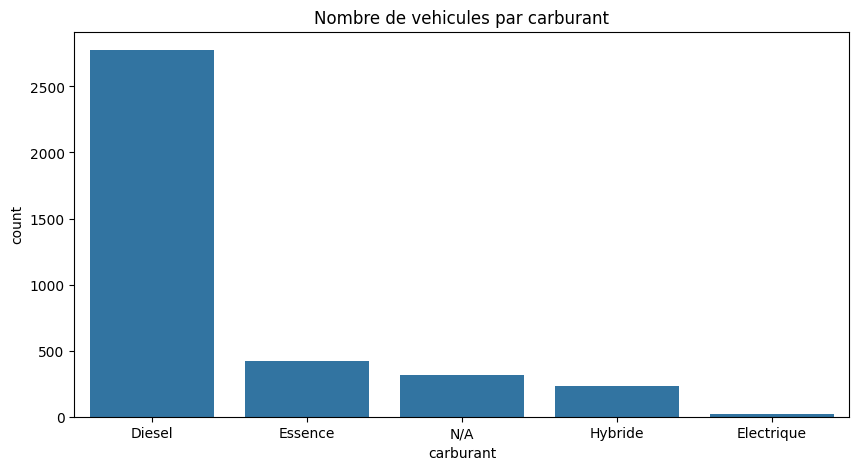

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(
    x = 'carburant',
    data = df,
    order = df['carburant'].value_counts().index[:10]
)
plt.title("Nombre de vehicules par carburant")
plt.show()

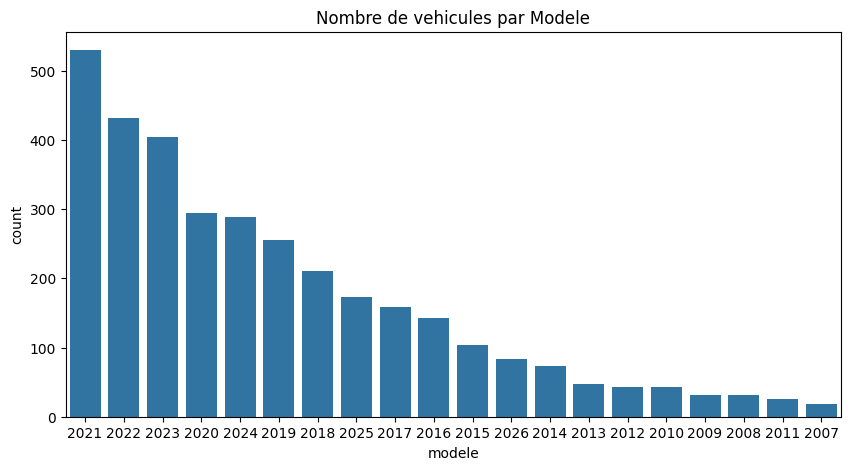

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(
    x = 'modele',
    data = df,
    order = df['modele'].value_counts().index[:20]
)
plt.title("Nombre de vehicules par Modele")
plt.show()